In this notebook we'll comparate the clustering algorithm in python.


The dataset we'll use to the comparasion is below

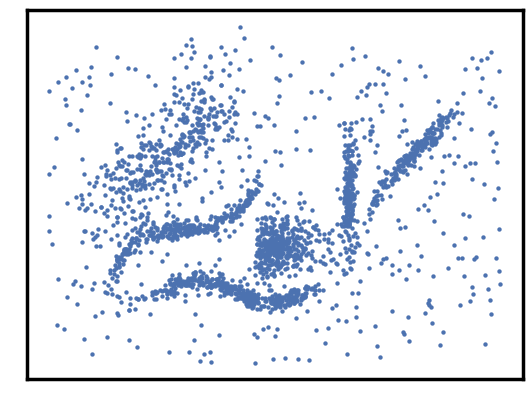

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' :1, 's' : 10, 'linewidths':0}
data = np.load('clusterable_data.npy')
plt.scatter(*data.T, c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

The fuction below is to plot the clusters and the time to finish,  and run the algorith.

In [56]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=12)
    plt.text(0, 0.65, 'Time {:.2f} s'.format(end_time - start_time), fontsize=8)

K-Means is the simplest clustering, 'cause has only one parameter k (number of clusters). 

C:\Users\brain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


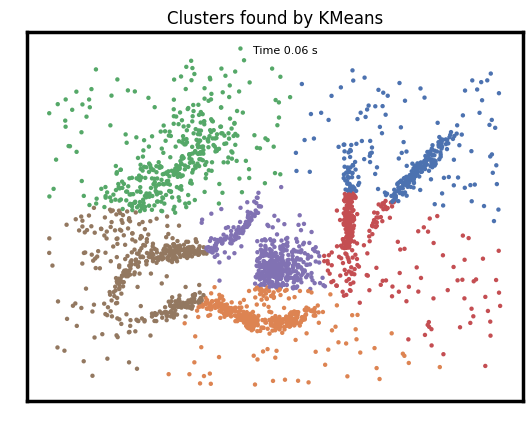

In [57]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

AffinityPropagation is simple as Kmeans, but it doesn't use the number of classes. Also, it use exemplars instead centroids.

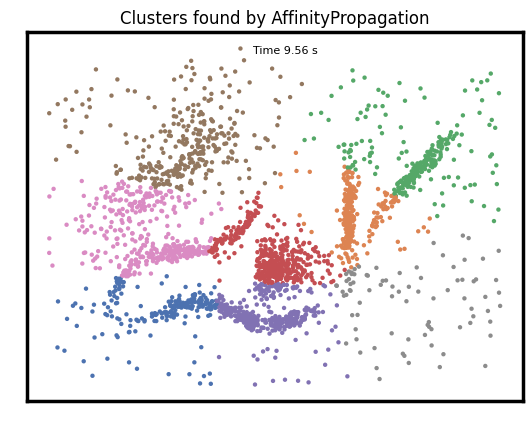

In [58]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

MeanShift is based in centroids like KMeans and AffinityPropagation. The idea of algorithm is that there exists some probability density function from which the data is drawn, and tries to place centroids of clusters at the maxima of that density function.

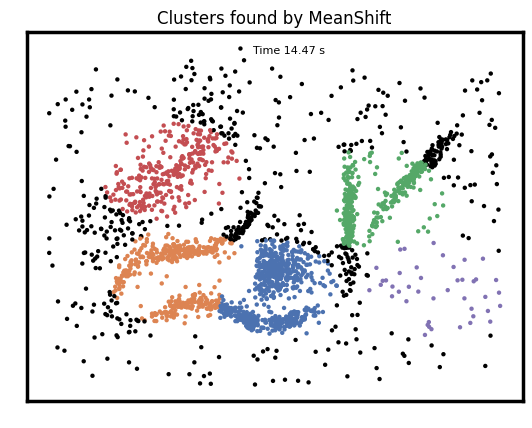

In [64]:
plot_clusters(data, cluster.MeanShift, (), {'bandwidth':0.175,'cluster_all':False})

In spectral clustering, data points are treated as nodes of a graph. Thus, spectral clustering is a graph partitioning problem. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters. No assumption is made about the shape/form of the clusters. The goal of spectral clustering is to cluster data that is connected but not necessarily compact or clustered within convex boundaries.

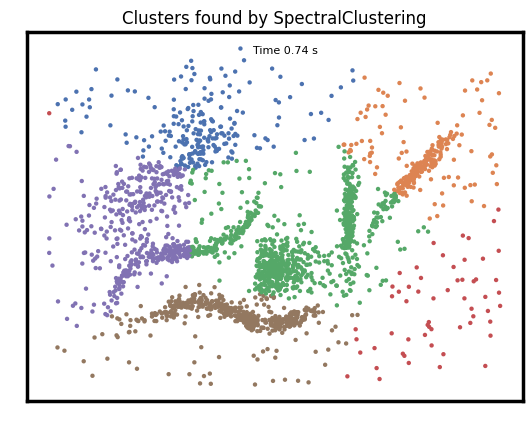

In [60]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})


The fundamental idea of AgglomerativeClustering is that you start with each point in it’s own cluster and then, for each cluster, use some criterion to choose another cluster to merge with

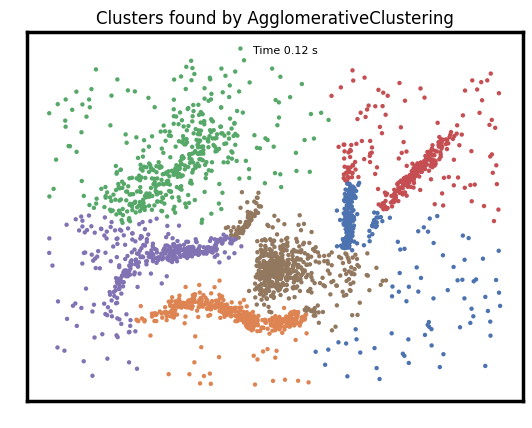

In [61]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})


DBSCAN is density based. The parameters of algorithm is epsilon (the radius of sphere of each point) and min_point(the minimum number of points in the sphere). There are centers points, outliers and edge points. Center points has the minimum number of points in your sphere of epsilon radius. Outliers has no mininum number of points in your sphere of radius epsilon and has no link with center points. Edge points has no minimum number of point, but has link with a center point. A cluster in DBSCAN is center point, when center points is in sphere of other center point both became only one cluster.

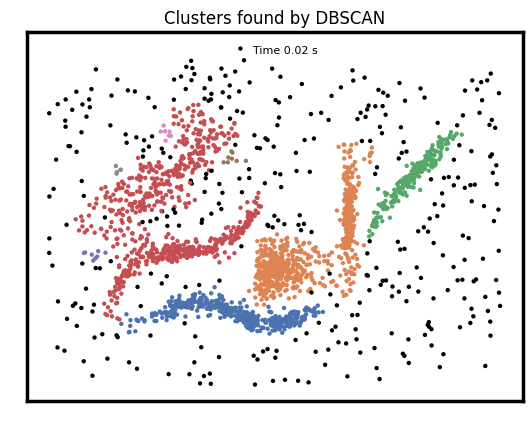

In [62]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

HDSCAN is the merge of DBSCAN and Single Link (hierarchy).

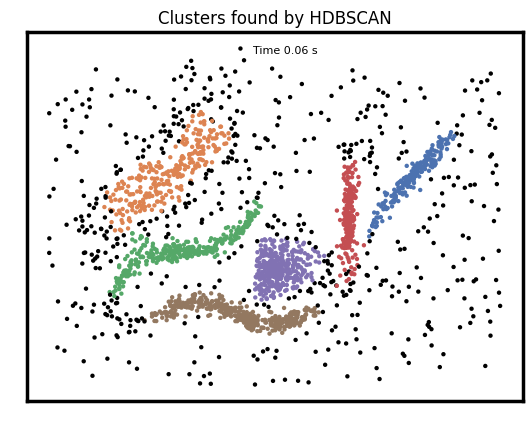

In [63]:
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})